In [1]:
%load_ext autoreload 
%autoreload 2

%matplotlib inline

In [2]:
from src.lights import change_lights
from src.main import generate_scenario, run_scenario, run_scenario_optimized
from src.logger import ExperimentLogger

from utils.common import do_test_steps, create_simulator, create_simulators, get_camera_matrix, place_agent

from concurrent.futures import ThreadPoolExecutor

pybullet build time: Nov  9 2023 11:43:30


PluginManager::Manager: duplicate static plugin AssimpImporter, ignoring
PluginManager::Manager: duplicate static plugin BasisImporter, ignoring
PluginManager::Manager: duplicate static plugin AnySceneImporter, ignoring
PluginManager::Manager: duplicate static plugin StbImageImporter, ignoring
PluginManager::Manager: duplicate static plugin AnyImageImporter, ignoring
PluginManager::Manager: duplicate static plugin GltfImporter, ignoring


In [3]:
DEBUG = True

In [4]:
sim_settings_filename = 'sim_settings_0.json'

In [5]:
STEP_MULTIPLIER = 25
ANGLE_MULTIPLIER = 5

In [6]:
logger = ExperimentLogger(sim_settings_filename)
sim_settings, light_settings = logger.get_settings()


In [7]:
# create_simulator

try:
    sim_planner.close()
    sim_agent.close()
except NameError:
    pass

sim_agent, sim_planner, sim_settings_planner = create_simulators(sim_settings, STEP_MULTIPLIER, ANGLE_MULTIPLIER)

Renderer: Apple M1 by Apple
OpenGL version: 4.1 Metal - 83.1
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_ES2_compatibility
    GL_ARB_separate_shader_objects
    GL_ARB_texture_storage
    GL_EXT_texture_filter_anisotropic
    GL_EXT_debug_label
    GL_EXT_debug_marker
Using driver workarounds:
    no-layout-qualifiers-on-old-glsl
    apple-buffer-texture-unbind-on-buffer-modify


[04:02:20:295045]:[Warning]:[Metadata] AttributesManagerBase.h(398)::buildAttrSrcPathsFromJSONAndLoad : <Articulated Object> : No Glob path result found for `./../data/hab_fetch_1.0/robots/fetch_no_base.urdf` so unable to load templates from that path.
PluginManager::Manager: duplicate static plugin AssimpImporter, ignoring
PluginManager::Manager: duplicate static plugin BasisImporter, ignoring
PluginManager::Manager: duplicate static plugin AnySceneImporter, ignoring
PluginManager::Manager: duplicate static plugin StbImageImporter, ignoring
PluginManager::Manager: duplicate static plugin AnyImageImporter, ignoring
PluginManager::Manager: duplicate static plugin GltfImporter, ignoring
MeshTools::compile(): ignoring Trade::MeshAttribute::TextureCoordinates 1 as its biding slot is already occupied by Trade::MeshAttribute::TextureCoordinates 0
MeshTools::compile(): ignoring Trade::MeshAttribute::TextureCoordinates 1 as its biding slot is already occupied by Trade::MeshAttribute::TextureCo

  0%|          | 0/10 [00:00<?, ?it/s]

NavMesh area = 31.801837921142578
Bounds =  [-2.6617632  -0.04774481 -4.759779  ] [4.5961666 4.659499  8.168275 ]
Start point : [-0.9637315   0.15225519 -1.4176823 ]
Random navigable points :  [3.7817829  0.15225519 4.7572308 ] [3.4509368  0.15225519 0.97880846] [1.6023071  0.15225519 4.5207653 ] [ 3.0349667   0.27168027 -0.97849435] [-0.41610354  0.15225519  0.09179905] [ 2.5728009   0.45112094 -1.2306573 ] [-1.0569131   0.15225519 -3.3151984 ] [0.6242094  0.15225519 0.35096738] [ 2.8259256   0.17548959 -0.7045061 ] [1.8096129  0.15225519 3.369741  ]
Are points navigable? True
[array([16.98031664, 33.42096806]), array([64.43546295, 95.17009735]), array([61.12699986, 57.38587379]), array([42.64070511, 92.80544281]), array([56.9672966 , 37.81284571]), array([22.4565959 , 48.51578236]), array([52.34563828, 35.29121637]), array([16.04850054, 14.44580555]), array([32.85972595, 51.10746384]), array([54.87689018, 40.55273056]), array([44.71375942, 81.29520416])]


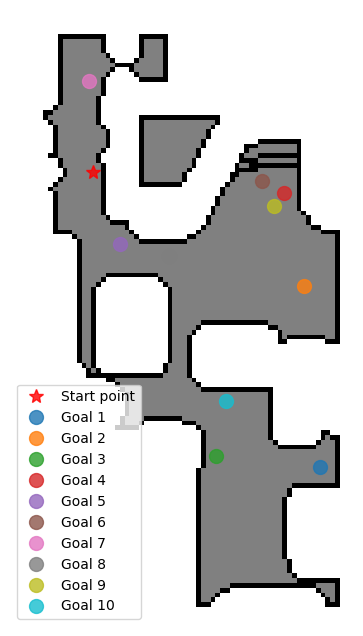

In [8]:
start_point, navigatable_points = generate_scenario(sim_agent, sim_settings, display=True)

In [9]:
sim_planner = place_agent(sim_planner, sim_settings['default_agent'], start_point)
sim_agent = place_agent(sim_agent, sim_settings['default_agent'], start_point)

In [10]:
print(sim_planner.agents[0].get_state())
print(sim_agent.agents[0].get_state())

AgentState(position=array([-0.9637315 ,  0.15225519, -1.4176823 ], dtype=float32), rotation=quaternion(1, 0, 0, 0), sensor_states={'color_sensor': SixDOFPose(position=array([-0.9637315,  1.6522552, -1.4176823], dtype=float32), rotation=quaternion(1, 0, 0, 0)), 'depth_sensor': SixDOFPose(position=array([-0.9637315,  1.6522552, -1.4176823], dtype=float32), rotation=quaternion(1, 0, 0, 0)), 'semantic_sensor': SixDOFPose(position=array([-0.9637315,  1.6522552, -1.4176823], dtype=float32), rotation=quaternion(1, 0, 0, 0))})
AgentState(position=array([-0.9637315 ,  0.15225519, -1.4176823 ], dtype=float32), rotation=quaternion(1, 0, 0, 0), sensor_states={'color_sensor': SixDOFPose(position=array([-0.9637315,  1.6522552, -1.4176823], dtype=float32), rotation=quaternion(1, 0, 0, 0)), 'depth_sensor': SixDOFPose(position=array([-0.9637315,  1.6522552, -1.4176823], dtype=float32), rotation=quaternion(1, 0, 0, 0)), 'semantic_sensor': SixDOFPose(position=array([-0.9637315,  1.6522552, -1.4176823], d

In [11]:
print(sim_agent.agents[0])
print(sim_planner.agents[0])

Agent(agent_config=AgentConfiguration(height=1.5, radius=0.2, sensor_specifications=[<habitat_sim._ext.habitat_sim_bindings.CameraSensorSpec object at 0x7fb8e910f5e0>, <habitat_sim._ext.habitat_sim_bindings.CameraSensorSpec object at 0x7fb8e91161d0>, <habitat_sim._ext.habitat_sim_bindings.CameraSensorSpec object at 0x7fb8e9116130>], action_space={'move_forward': ActionSpec(name='move_forward', actuation=ActuationSpec(amount=0.01, constraint=None)), 'turn_left': ActionSpec(name='turn_left', actuation=ActuationSpec(amount=1.0, constraint=None)), 'turn_right': ActionSpec(name='turn_right', actuation=ActuationSpec(amount=1.0, constraint=None))}, body_type='cylinder'), _sensors={'color_sensor': <habitat_sim._ext.habitat_sim_bindings.CameraSensor object at 0x7fb8e9117370>, 'depth_sensor': <habitat_sim._ext.habitat_sim_bindings.CameraSensor object at 0x7fb8e9117430>, 'semantic_sensor': <habitat_sim._ext.habitat_sim_bindings.CameraSensor object at 0x7fb8e91174f0>}, controls=ObjectControls(move

In [12]:
assert all(sim_planner.agents[sim_settings['default_agent']].get_state().position == start_point)
assert all(sim_agent.agents[sim_settings['default_agent']].get_state().position == start_point)

In [ ]:
if DEBUG:
    sim_planner, _ = change_lights(sim_planner, sim_settings, light_settings, life_index=0)
    do_test_steps(sim_planner, sim_settings, max_frames=5)

In [ ]:
run_scenario(sim_planner, sim_settings_planner, light_settings, navigatable_points, logger)

sim_settings_0.json proccessing:   0%|          | 0/10 [00:00<?, ?it/s]

Light setup: [('0', {'model': <LightPositionModel.Global: 1>, 'vector': [-0.9100000000000004, 2.3, 2.53, 1.0], 'color': [2.693856566773421, 2.8386875649870458, 2.8966199642724955]}), ('1', {'model': <LightPositionModel.Global: 1>, 'vector': [-1.4000000000000001, 2.3, -0.17500000000000016, 1.0], 'color': [2.693856566773421, 2.8386875649870458, 2.8966199642724955]}), ('2', {'model': <LightPositionModel.Global: 1>, 'vector': [-1.4, 2.3, -2.7750000000000004, 1.0], 'color': [2.693856566773421, 2.8386875649870458, 2.8966199642724955]}), ('3', {'model': <LightPositionModel.Global: 1>, 'vector': [6.928, 3.3, 6.849, 1.0], 'color': [11.140846016432675, 11.140846016432675, 11.140846016432675]}), ('4', {'model': <LightPositionModel.Global: 1>, 'vector': [7.048, 3.3, 2.3780000000000014, 1.0], 'color': [18.302818455567966, 18.302818455567966, 18.302818455567966]}), ('5', {'model': <LightPositionModel.Global: 1>, 'vector': [1.0026700000000002, 1.75, 2.3869999999999996, 1.0], 'color': [2.4509861236151

[04:02:43:078844]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 1
GL::AbstractShaderProgram::link(): linking succeeded with the following message:
GL::AbstractShaderProgram::link(): linking succeeded with the following message:
GL::AbstractShaderProgram::link(): linking succeeded with the following message:
GL::AbstractShaderProgram::link(): linking succeeded with the following message:
GL::AbstractShaderProgram::link(): linking succeeded with the following message:
GL::AbstractShaderProgram::link(): linking succeeded with the following message:
GL::AbstractShaderProgram::link(): linking succeeded with the following message:
[04:02:43:223392]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 1
GL::AbstractShaderProgram::link(): linking succeeded with the following message:
GL::Abst

Navigation #0:   0%|          | 0/2241 [00:00<?, ?it/s]

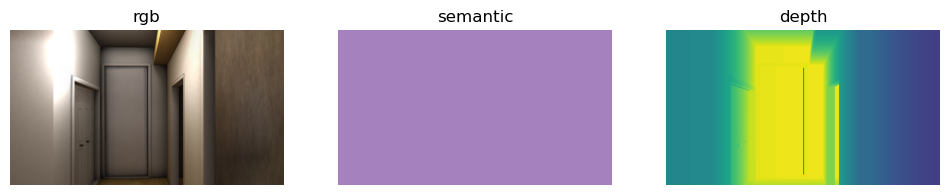

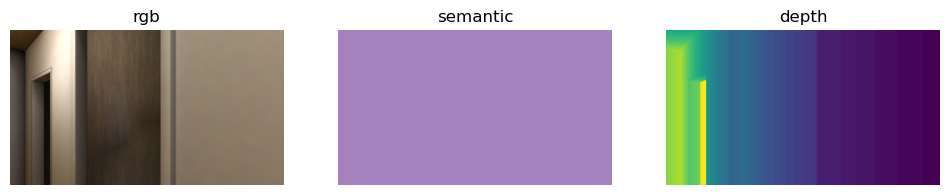

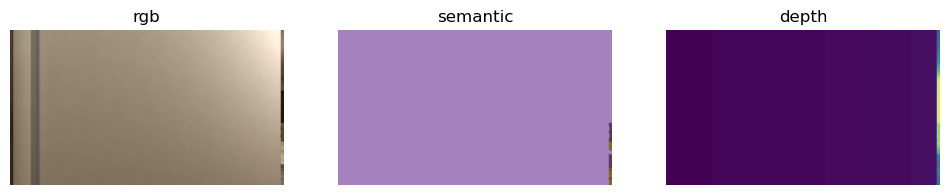

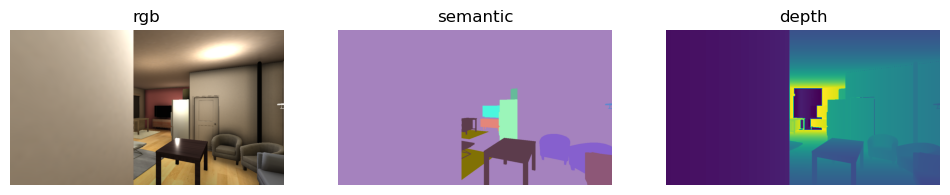

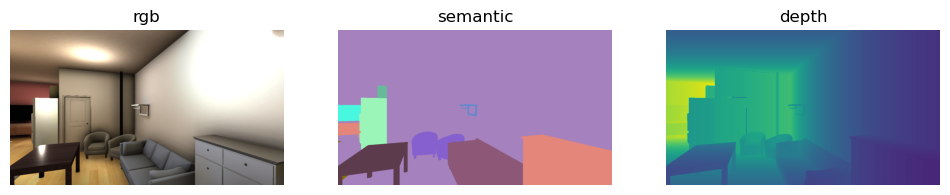

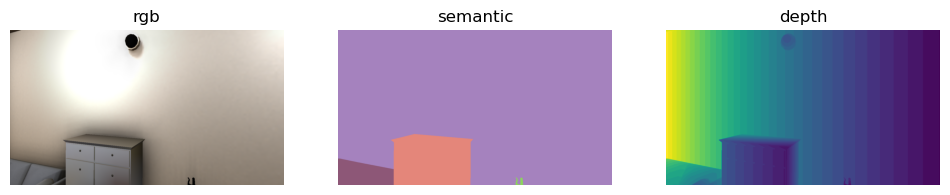

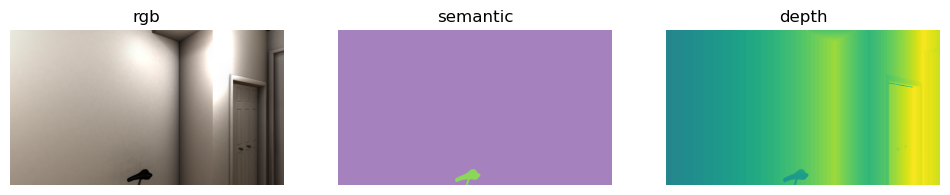

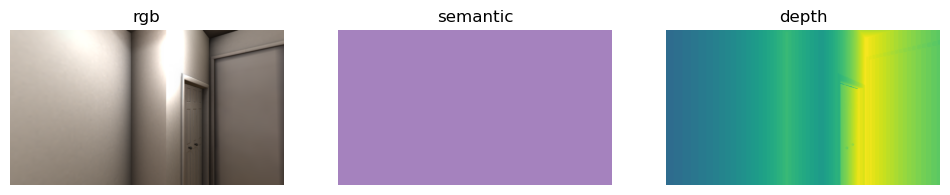

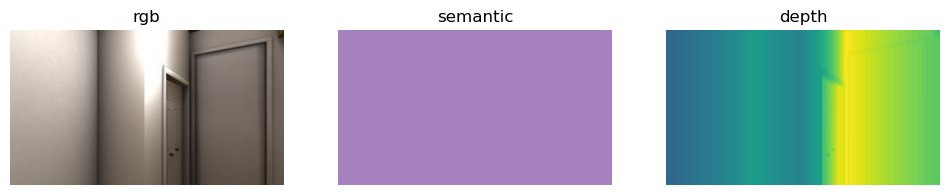

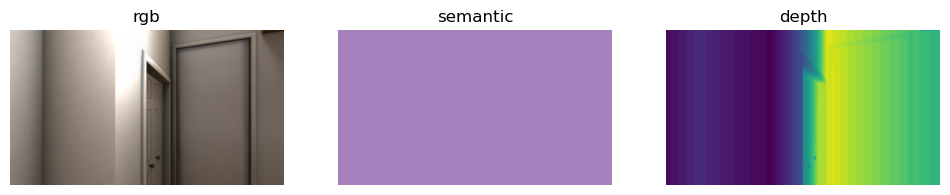

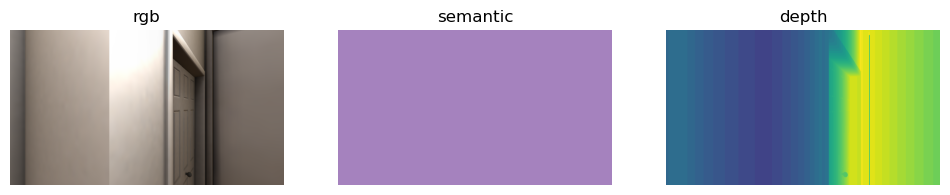

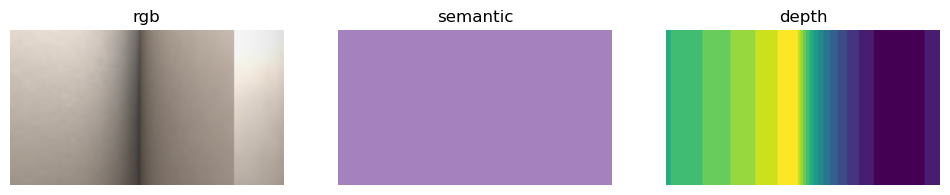

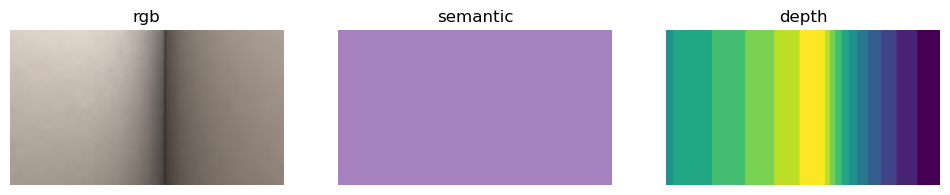

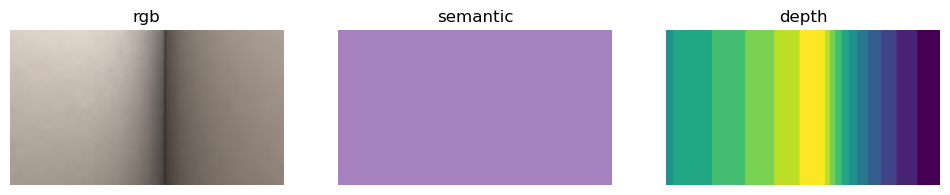

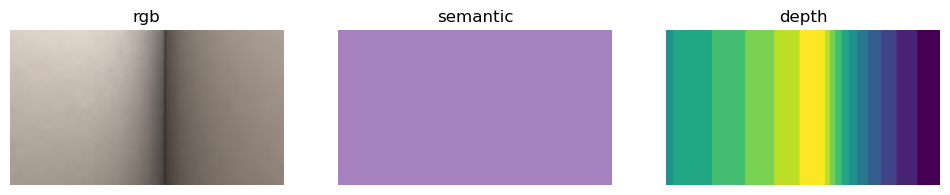

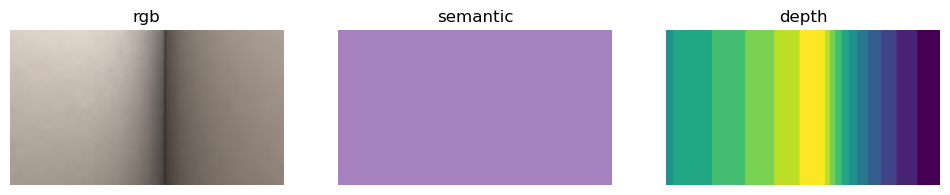

KeyboardInterrupt: 

In [13]:
run_scenario_optimized(sim_planner, sim_agent,
                  sim_settings_planner, sim_settings,
                  light_settings, navigatable_points,
                  logger, step_multiplier=STEP_MULTIPLIER, angle_multiplier=ANGLE_MULTIPLIER)

In [14]:
K_agent = get_camera_matrix(sim_agent.agents[sim_settings['default_agent']])
K_planner = get_camera_matrix(sim_planner.agents[sim_settings_planner['default_agent']])

In [15]:
print(f"camera_matrix = \n{K_agent}\n\ndepth_scale = {sim_settings['depth_scale']}")

camera_matrix = 
[[600.    0.  599.5]
 [  0.  600.  339.5]
 [  0.    0.    1. ]]

depth_scale = 6553.5


In [ ]:
!rm generated.zip
!zip -r generated.zip generated/